Text Classification

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np

try:
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

import tensorflow_hub as hub
import tensorflow_datasets as tfds

print("버전: ", tf.__version__)
print("즉시 실행 모드: ", tf.executing_eagerly())
print("허브 버전: ", hub.__version__)
print("GPU ", "사용 가능" if tf.config.experimental.list_physical_devices("GPU") else "사용 불가능")

TensorFlow 2.x selected.
버전:  2.1.0-rc1
즉시 실행 모드:  True
허브 버전:  0.7.0
GPU  사용 불가능


In [0]:
train_validation_split = tfds.Split.TRAIN.subsplit([6, 4])

(train_data, validation_data), test_data = tfds.load(
    name="imdb_reviews", 
    split=(train_validation_split, tfds.Split.TEST),
    as_supervised=True
)

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/0.1.0. Subsequent calls will reuse this data.


In [0]:
train_examples_batch, train_labels_batch = next(iter(train_data.batch(10)))
print(train_examples_batch)
train_labels_batch

tf.Tensor(
[b"As a lifelong fan of Dickens, I have invariably been disappointed by adaptations of his novels.<br /><br />Although his works presented an extremely accurate re-telling of human life at every level in Victorian Britain, throughout them all was a pervasive thread of humour that could be both playful or sarcastic as the narrative dictated. In a way, he was a literary caricaturist and cartoonist. He could be serious and hilarious in the same sentence. He pricked pride, lampooned arrogance, celebrated modesty, and empathised with loneliness and poverty. It may be a clich\xc3\xa9, but he was a people's writer.<br /><br />And it is the comedy that is so often missing from his interpretations. At the time of writing, Oliver Twist is being dramatised in serial form on BBC television. All of the misery and cruelty is their, but non of the humour, irony, and savage lampoonery. The result is just a dark, dismal experience: the story penned by a journalist rather than a novelist. It'

<tf.Tensor: shape=(10,), dtype=int64, numpy=array([1, 1, 1, 1, 1, 1, 0, 1, 1, 0])>

In [0]:
embedding = "https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1"
hub_layer = hub.KerasLayer(embedding, input_shape=[], 
                           dtype=tf.string, trainable=True
)
hub_layer(train_examples_batch[:3])

<tf.Tensor: shape=(3, 20), dtype=float32, numpy=
array([[ 3.9819887 , -4.4838037 ,  5.177359  , -2.3643482 , -3.2938678 ,
        -3.5364532 , -2.4786978 ,  2.5525482 ,  6.688532  , -2.3076782 ,
        -1.9807833 ,  1.1315885 , -3.0339816 , -0.7604128 , -5.743445  ,
         3.4242578 ,  4.790099  , -4.03061   , -5.992149  , -1.7297493 ],
       [ 3.4232912 , -4.230874  ,  4.1488533 , -0.29553518, -6.802391  ,
        -2.5163853 , -4.4002395 ,  1.905792  ,  4.7512794 , -0.40538004,
        -4.3401685 ,  1.0361497 ,  0.9744097 ,  0.71507156, -6.2657013 ,
         0.16533905,  4.560262  , -1.3106939 , -3.1121316 , -2.1338716 ],
       [ 3.8508697 , -5.003031  ,  4.8700504 , -0.04324996, -5.893603  ,
        -5.2983093 , -4.004676  ,  4.1236343 ,  6.267754  ,  0.11632943,
        -3.5934832 ,  0.8023905 ,  0.56146765,  0.9192484 , -7.3066816 ,
         2.8202746 ,  6.2000837 , -3.5709393 , -4.564525  , -2.305622  ]],
      dtype=float32)>

In [0]:
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

print(model.summary)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy']
              )

history = model.fit(train_data.shuffle(10000).batch(512),
                    epochs=20,
                    validation_data=validation_data.batch(512),
                    verbose=1)

<bound method Network.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x7fe6f529dcf8>>
Epoch 1/20
30/30 [==============================] - 7s 224ms/step - loss: 0.8119 - accuracy: 0.4662 - val_loss: 0.7059 - val_accuracy: 0.5498
Epoch 2/20
30/30 [==============================] - 6s 203ms/step - loss: 0.6721 - accuracy: 0.5977 - val_loss: 0.6455 - val_accuracy: 0.6346
Epoch 3/20
30/30 [==============================] - 6s 197ms/step - loss: 0.6221 - accuracy: 0.6571 - val_loss: 0.6039 - val_accuracy: 0.6795
Epoch 4/20
30/30 [==============================] - 6s 214ms/step - loss: 0.5789 - accuracy: 0.6985 - val_loss: 0.5655 - val_accuracy: 0.7160
Epoch 5/20
30/30 [==============================] - 6s 209ms/step - loss: 0.5372 - accuracy: 0.7379 - val_loss: 0.5239 - val_accuracy: 0.7467
Epoch 6/20
30/30 [==============================] - 6s 206ms/step - loss: 0.4881 - accuracy: 0.7720 - val_loss: 0.4846 - val_accuracy: 0.7732
Epoch 7/20
30/30 [================

In [0]:
results = model.evaluate(test_data.batch(512), verbose=2)
for name, value in zip(model.metrics_names, results):
  print("%s: %.3f" % (name, value))

loss: 0.316
accuracy: 0.865


Linear Regression with tf.estimator

In [0]:
!pip install -q sklearn

In [0]:
import os
import sys

import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib
import tensorflow.compat.v2.feature_column as fc

In [0]:
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv')
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv')
y_train = dftrain.pop('survived')
y_eval = dfeval.pop('survived')

In [0]:
dftrain.head()

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [0]:
dftrain.describe()

,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


In [0]:
dftrain.shape[0], dfeval.shape[0]

(627, 264)

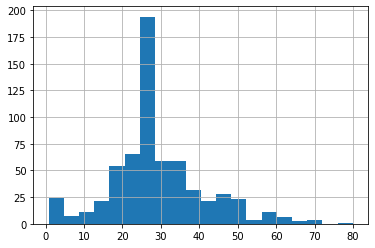

In [0]:
dftrain.age.hist(bins=20)

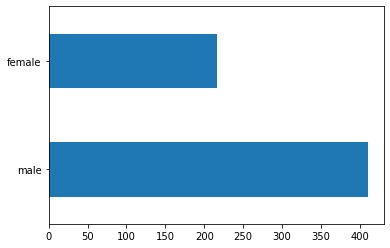

In [0]:
dftrain.sex.value_counts().plot(kind='barh')

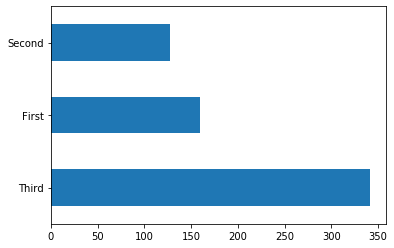

In [0]:
dftrain['class'].value_counts().plot(kind='barh')

Text(0.5, 0, '% survive')

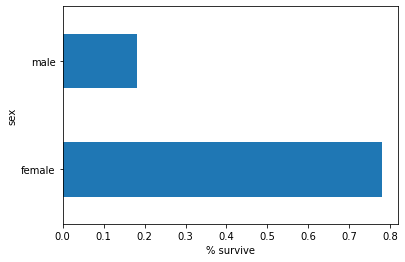

In [0]:
pd.concat([dftrain, y_train], axis=1).groupby('sex').survived.mean().plot(kind='barh').set_xlabel('% survive')

In [0]:
CATEGORICAL_COLUMNS = ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck', 'embark_town', 'alone']
NUMERIC_COLUMNS = ['age', 'fare']

feature_columns = []
for feature_name in CATEGORICAL_COLUMNS:
  vocabulary = dftrain[feature_name].unique()
  feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))

for feature_name in NUMERIC_COLUMNS:
  feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

In [0]:
def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
  def input_function():
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))
    if shuffle:
      ds = ds.shuffle(1000)
    ds = ds.batch(batch_size).repeat(num_epochs)
    return ds
  return input_function

train_input_fn = make_input_fn(dftrain, y_train)
eval_input_fn = make_input_fn(dfeval, y_eval, num_epochs=1, shuffle=False)

In [0]:
ds = make_input_fn(dftrain, y_train, batch_size=10)()
for feature_batch, label_batch in ds.take(1):
  print('특성 키:', list(feature_batch.keys()))
  print()
  print('클래스 배치:', feature_batch['class'].numpy())
  print()
  print('레이블 배치:', label_batch.numpy())

특성 키: ['sex', 'age', 'n_siblings_spouses', 'parch', 'fare', 'class', 'deck', 'embark_town', 'alone']

클래스 배치: [b'Third' b'First' b'Third' b'Third' b'First' b'First' b'Third' b'Third'
 b'First' b'Second']

레이블 배치: [0 1 0 0 0 1 0 0 0 0]


In [0]:
age_column = feature_columns[7]
tf.keras.layers.DenseFeatures([age_column])(feature_batch).numpy()


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.




If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



array([[28.],
       [31.],
       [28.],
       [ 4.],
       [28.],
       [51.],
       [28.],
       [36.],
       [45.],
       [39.]], dtype=float32)

In [0]:
gender_column = feature_columns[0]
tf.keras.layers.DenseFeatures([tf.feature_column.indicator_column(gender_column)])(feature_batch).numpy()


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.




If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.


Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.


Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.


Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.


array([[0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [0]:
linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns)
linear_est.train(train_input_fn)
result = linear_est.evaluate(eval_input_fn)

clear_output()
print(result)

{'accuracy': 0.75, 'accuracy_baseline': 0.625, 'auc': 0.8353842, 'auc_precision_recall': 0.7900833, 'average_loss': 0.4737839, 'label/mean': 0.375, 'loss': 0.46529377, 'precision': 0.6666667, 'prediction/mean': 0.39093065, 'recall': 0.6666667, 'global_step': 200}


In [0]:
age_x_gender = tf.feature_column.crossed_column(['age', 'sex'], hash_bucket_size=100)

In [0]:
derived_feature_columns = [age_x_gender]
linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns+derived_feature_columns)
linear_est.train(train_input_fn)
result = linear_est.evaluate(eval_input_fn)

clear_output()
print(result)

{'accuracy': 0.7765151, 'accuracy_baseline': 0.625, 'auc': 0.84897465, 'auc_precision_recall': 0.77823025, 'average_loss': 0.46663442, 'label/mean': 0.375, 'loss': 0.45614317, 'precision': 0.71276593, 'prediction/mean': 0.3591751, 'recall': 0.67676765, 'global_step': 200}


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.



If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.




If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from /tmp/tmpf3oq18u5/model.ckpt-200


INFO:tensorflow:Restoring parameters from /tmp/tmpf3oq18u5/model.ckpt-200


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 50696 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 52769 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 54869 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 47456 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 50696 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 52769 missing from current font.
  font.set_te

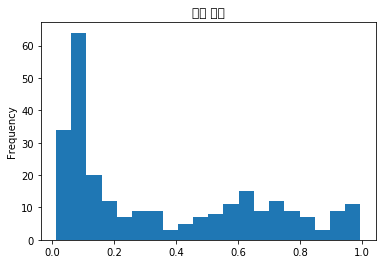

In [0]:
pred_dicts = list(linear_est.predict(eval_input_fn))
probs = pd.Series([pred['probabilities'][1] for pred in pred_dicts])

probs.plot(kind='hist', bins=20, title='예측 확률')

(0, 1.05)

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 50724 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 53456 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 47456 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 50724 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 53456 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 47456 missing from current font.
  font.set_text

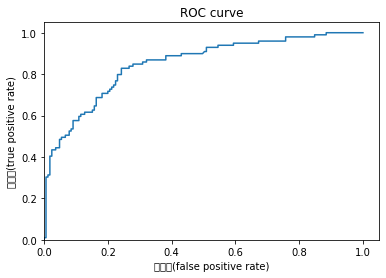

In [0]:
from sklearn.metrics import roc_curve
from matplotlib import pyplot as plt

fpr, tpr, _ = roc_curve(y_eval, probs)
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('오탐률(false positive rate)')
plt.ylabel('정탐률(true positive rate)')
plt.xlim(0,)
plt.ylim(0,)

Overfit and Underfit

17465344/17464789 [==============================] - 0s 0us/step


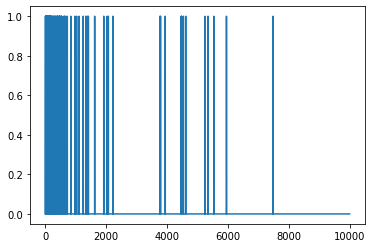

In [0]:
from tensorflow import keras 

NUM_WORDS = 10000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

def multi_hot_sequences(sequences, dimension):
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0  
    return results

train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

plt.plot(train_data[0])

In [0]:
baseline_model = keras.Sequential([
  keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS, )),
  keras.layers.Dense(16, activation='relu'),
  keras.layers.Dense(1, activation='sigmoid')
])

baseline_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

print(baseline_model.summary())

baseline_history = baseline_model.fit(train_data, train_labels, epochs=20, batch_size=512, validation_data=(test_data, test_labels), verbose=2)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_6 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________
None
Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 3s - loss: 0.4645 - accuracy: 0.8123 - binary_crossentropy: 0.4645 - val_loss: 0.3305 - val_accuracy: 0.8759 - val_binary_crossentropy: 0.3305
Epoch 2/20
25000/25000 - 3s - loss: 0.2417 - accuracy: 0.9155 - binary_crossentropy: 0.2417 - val_loss: 0.2925 - val_accuracy: 0.8837 - val_binary_crossent

In [0]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

smaller_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy', 'binary_crossentropy'])

print(smaller_model.summary())

smaller_history = smaller_model.fit(train_data, train_labels, epochs=20, batch_size=512, validation_data=(test_data, test_labels), verbose=2)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_9 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________
None
Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 3s - loss: 0.6029 - accuracy: 0.6378 - binary_crossentropy: 0.6029 - val_loss: 0.5395 - val_accuracy: 0.7436 - val_binary_crossentropy: 0.5395
Epoch 2/20
25000/25000 - 3s - loss: 0.4894 - accuracy: 0.8288 - binary_crossentropy: 0.4894 - val_loss: 0.4872 - val_accuracy: 0.8392 - val_binary_crossentro

In [0]:
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

bigger_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy','binary_crossentropy'])

print(bigger_model.summary())

bigger_history = bigger_model.fit(train_data, train_labels, epochs=20, batch_size=512, validation_data=(test_data, test_labels), verbose=2)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 512)               5120512   
_________________________________________________________________
dense_12 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________
None
Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 16s - loss: 0.3563 - accuracy: 0.8405 - binary_crossentropy: 0.3563 - val_loss: 0.2932 - val_accuracy: 0.8788 - val_binary_crossentropy: 0.2932
Epoch 2/20
25000/25000 - 15s - loss: 0.1431 - accuracy: 0.9484 - binary_crossentropy: 0.1431 - val_loss: 0.3280 - val_accuracy: 0.8741 - val_binary_cr

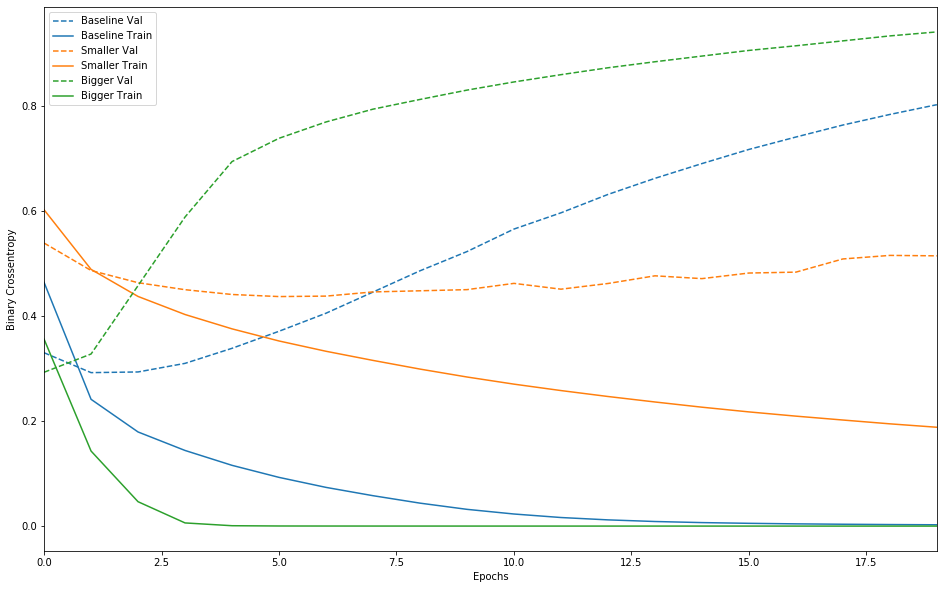

In [0]:
def plot_history(histories, key='binary_crossentropy'):
  plt.figure(figsize=(16,10))

  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])


plot_history([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('bigger', bigger_history)])

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 3s - loss: 0.5576 - accuracy: 0.7928 - binary_crossentropy: 0.5211 - val_loss: 0.4216 - val_accuracy: 0.8636 - val_binary_crossentropy: 0.3850
Epoch 2/20
25000/25000 - 3s - loss: 0.3350 - accuracy: 0.8996 - binary_crossentropy: 0.2941 - val_loss: 0.3433 - val_accuracy: 0.8873 - val_binary_crossentropy: 0.2988
Epoch 3/20
25000/25000 - 3s - loss: 0.2739 - accuracy: 0.9207 - binary_crossentropy: 0.2267 - val_loss: 0.3383 - val_accuracy: 0.8848 - val_binary_crossentropy: 0.2890
Epoch 4/20
25000/25000 - 3s - loss: 0.2470 - accuracy: 0.9312 - binary_crossentropy: 0.1958 - val_loss: 0.3357 - val_accuracy: 0.8862 - val_binary_crossentropy: 0.2832
Epoch 5/20
25000/25000 - 3s - loss: 0.2296 - accuracy: 0.9397 - binary_crossentropy: 0.1762 - val_loss: 0.3442 - val_accuracy: 0.8822 - val_binary_crossentropy: 0.2899
Epoch 6/20
25000/25000 - 3s - loss: 0.2190 - accuracy: 0.9431 - binary_crossentropy: 0.1637 - val_loss: 0.3514

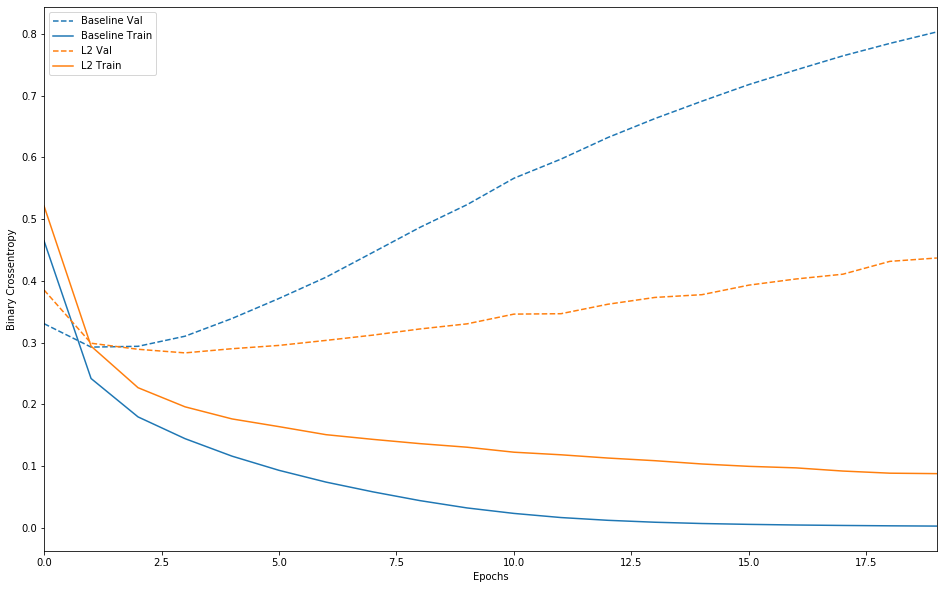

In [0]:
l2_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001), activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001), activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

l2_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'binary_crossentropy'])

l2_model_history = l2_model.fit(train_data, train_labels, epochs=20, batch_size=512, validation_data=(test_data, test_labels), verbose=2)

plot_history([('baseline', baseline_history), ('l2', l2_model_history)])

In [0]:
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

dpt_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy','binary_crossentropy'])

dpt_model_history = dpt_model.fit(train_data, train_labels, epochs=20, batch_size=512, validation_data=(test_data, test_labels), verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 3s - loss: 0.6379 - accuracy: 0.6283 - binary_crossentropy: 0.6379 - val_loss: 0.5131 - val_accuracy: 0.8397 - val_binary_crossentropy: 0.5131
Epoch 2/20
25000/25000 - 3s - loss: 0.4821 - accuracy: 0.7932 - binary_crossentropy: 0.4821 - val_loss: 0.3586 - val_accuracy: 0.8756 - val_binary_crossentropy: 0.3586
Epoch 3/20
25000/25000 - 3s - loss: 0.3693 - accuracy: 0.8654 - binary_crossentropy: 0.3693 - val_loss: 0.2986 - val_accuracy: 0.8859 - val_binary_crossentropy: 0.2986
Epoch 4/20
25000/25000 - 3s - loss: 0.3029 - accuracy: 0.8951 - binary_crossentropy: 0.3029 - val_loss: 0.2825 - val_accuracy: 0.8891 - val_binary_crossentropy: 0.2825
Epoch 5/20
25000/25000 - 3s - loss: 0.2605 - accuracy: 0.9124 - binary_crossentropy: 0.2605 - val_loss: 0.2786 - val_accuracy: 0.8887 - val_binary_crossentropy: 0.2786
Epoch 6/20
25000/25000 - 3s - loss: 0.2270 - accuracy: 0.9261 - binary_crossentropy: 0.2270 - val_loss: 0.2891

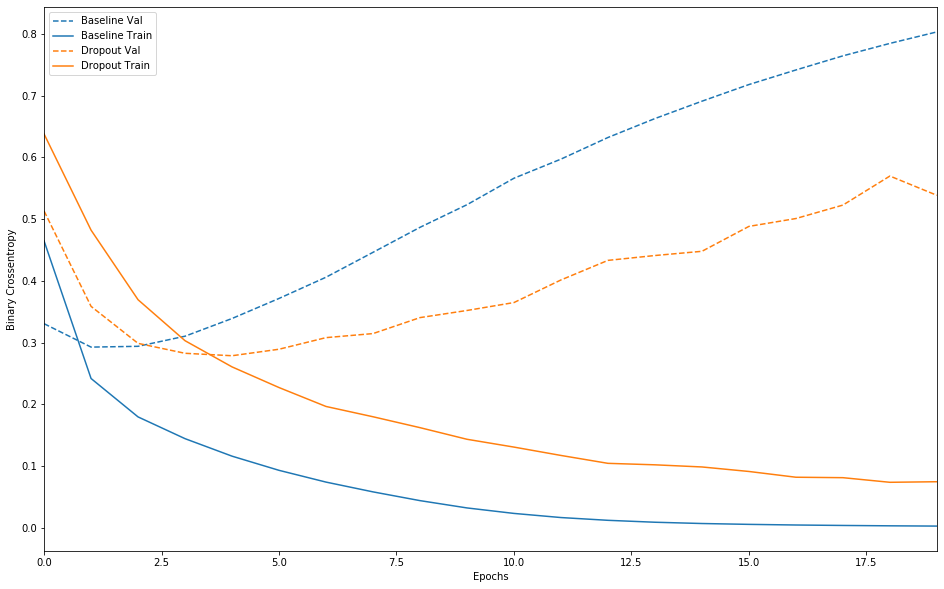

In [0]:
plot_history([('baseline', baseline_history),
              ('dropout', dpt_model_history)])

Load Data CSV

In [1]:
try:
  %tensorflow_version 2.x
except Exception:
  pass

TensorFlow 2.x selected.


In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals
import functools

import numpy as np
import tensorflow as tf

In [3]:
TRAIN_DATA_URL = "https://storage.googleapis.com/tf-datasets/titanic/train.csv"
TEST_DATA_URL = "https://storage.googleapis.com/tf-datasets/titanic/eval.csv"

train_file_path = tf.keras.utils.get_file("train.csv", TRAIN_DATA_URL)
test_file_path = tf.keras.utils.get_file("eval.csv", TEST_DATA_URL)

16384/13049 [=====================================] - 0s 0us/step


In [0]:
np.set_printoptions(precision=3, suppress=True)

In [5]:
!head {train_file_path}

survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.25,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
1,female,26.0,0,0,7.925,Third,unknown,Southampton,y
1,female,35.0,1,0,53.1,First,C,Southampton,n
0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y
0,male,2.0,3,1,21.075,Third,unknown,Southampton,n
1,female,27.0,0,2,11.1333,Third,unknown,Southampton,n
1,female,14.0,1,0,30.0708,Second,unknown,Cherbourg,n
1,female,4.0,1,1,16.7,Third,G,Southampton,n


In [0]:
LABEL_COLUMN = 'survived'
LABELS = [0, 1]

In [0]:
def get_dataset(file_path, **kwargs):
  dataset = tf.data.experimental.make_csv_dataset(
      file_path,
      batch_size = 5, 
      label_name = LABEL_COLUMN,
      na_value = "?",
      num_epochs = 1,
      ignore_errors = True, 
      **kwargs)
  return dataset

raw_train_data = get_dataset(train_file_path)
raw_test_data = get_dataset(test_file_path)

In [0]:
def show_batch(dataset):
  for batch, label in dataset.take(1):
    for key, value in batch.items():
      print("{:20s}: {}".format(key,value.numpy()))

In [9]:
show_batch(raw_train_data)

sex                 : [b'male' b'female' b'male' b'male' b'male']
age                 : [20. 28. 18. 28. 28.]
n_siblings_spouses  : [1 0 0 0 0]
parch               : [0 0 0 0 0]
fare                : [ 7.925 13.     7.796 26.55   6.95 ]
class               : [b'Third' b'Second' b'Third' b'First' b'Third']
deck                : [b'unknown' b'unknown' b'unknown' b'unknown' b'unknown']
embark_town         : [b'Southampton' b'Southampton' b'Southampton' b'Southampton' b'Queenstown']
alone               : [b'n' b'y' b'y' b'y' b'y']


In [10]:
CSV_COLUMNS = ['survived', 'sex', 'age', 'n_siblings_spouses', 'parch', 'fare', 'class', 'deck', 'embark_town', 'alone']

temp_dataset = get_dataset(train_file_path, column_names=CSV_COLUMNS)

show_batch(temp_dataset)

sex                 : [b'female' b'male' b'female' b'female' b'female']
age                 : [28. 28. 17. 28. 18.]
n_siblings_spouses  : [0 0 0 0 0]
parch               : [0 0 0 0 0]
fare                : [ 7.75  13.863 12.    13.     9.842]
class               : [b'Third' b'Second' b'Second' b'Second' b'Third']
deck                : [b'unknown' b'unknown' b'unknown' b'unknown' b'unknown']
embark_town         : [b'Queenstown' b'Cherbourg' b'Cherbourg' b'Southampton' b'Southampton']
alone               : [b'y' b'y' b'y' b'y' b'y']


In [11]:
SELECT_COLUMNS = ['survived', 'age', 'n_siblings_spouses', 'class', 'deck', 'alone']

temp_dataset = get_dataset(train_file_path, select_columns=SELECT_COLUMNS)

show_batch(temp_dataset)

age                 : [28. 28. 28. 21. 34.]
n_siblings_spouses  : [0 0 0 0 1]
class               : [b'Second' b'Third' b'Third' b'Third' b'Second']
deck                : [b'unknown' b'unknown' b'unknown' b'unknown' b'unknown']
alone               : [b'y' b'y' b'y' b'y' b'n']


In [12]:
SELECT_COLUMNS = ['survived', 'age', 'n_siblings_spouses', 'parch', 'fare']
DEFAULTS = [0, 0.0, 0.0, 0.0, 0.0]
temp_dataset = get_dataset(train_file_path, 
                           select_columns = SELECT_COLUMNS,
                           column_defaults = DEFAULTS)

show_batch(temp_dataset)

age                 : [28. 39. 28. 28. 28.]
n_siblings_spouses  : [0. 1. 0. 1. 0.]
parch               : [0. 5. 0. 0. 0.]
fare                : [ 7.229 31.275  7.225 15.5    7.75 ]


In [0]:
example_batch, labels_batch = next(iter(temp_dataset)) 

In [0]:
def pack(features, label):
  return tf.stack(list(features.values()), axis=-1), label

In [15]:
packed_dataset = temp_dataset.map(pack)

for features, labels in packed_dataset.take(1):
  print(features.numpy())
  print()
  print(labels.numpy())

[[42.     1.     0.    52.   ]
 [28.     0.     0.     7.75 ]
 [39.     0.     0.    26.   ]
 [24.     0.     0.    83.158]
 [ 5.     0.     0.    12.475]]

[0 1 0 1 1]


In [16]:
show_batch(raw_train_data)

sex                 : [b'male' b'female' b'male' b'male' b'male']
age                 : [28. 39. 28. 28. 33.]
n_siblings_spouses  : [0 1 0 0 0]
parch               : [0 5 0 0 0]
fare                : [26.55  31.275 56.496  7.225  5.   ]
class               : [b'First' b'Third' b'Third' b'Third' b'First']
deck                : [b'C' b'unknown' b'unknown' b'unknown' b'B']
embark_town         : [b'Southampton' b'Southampton' b'Southampton' b'Cherbourg' b'Southampton']
alone               : [b'y' b'n' b'y' b'y' b'y']


In [0]:
example_batch, labels_batch = next(iter(temp_dataset)) 

In [0]:
class PackNumericFeatures(object):
  def __init__(self, names):
    self.names = names

  def __call__(self, features, labels):
    numeric_features = [features.pop(name) for name in self.names]
    numeric_features = [tf.cast(feat, tf.float32) for feat in numeric_features]
    numeric_features = tf.stack(numeric_features, axis=-1)
    features['numeric'] = numeric_features

    return features, labels

In [0]:
NUMERIC_FEATURES = ['age','n_siblings_spouses','parch', 'fare']

packed_train_data = raw_train_data.map(PackNumericFeatures(NUMERIC_FEATURES))

packed_test_data = raw_test_data.map(PackNumericFeatures(NUMERIC_FEATURES))

In [20]:
show_batch(packed_train_data)

sex                 : [b'female' b'male' b'male' b'male' b'male']
class               : [b'Third' b'Third' b'Third' b'Second' b'First']
deck                : [b'unknown' b'unknown' b'unknown' b'unknown' b'B']
embark_town         : [b'Cherbourg' b'Southampton' b'Southampton' b'Southampton' b'Cherbourg']
alone               : [b'n' b'y' b'y' b'y' b'y']
numeric             : [[ 0.75   2.     1.    19.258]
 [19.     0.     0.     7.775]
 [28.     0.     0.     7.05 ]
 [35.     0.     0.    10.5  ]
 [24.     0.     0.    79.2  ]]


In [0]:
example_batch, labels_batch = next(iter(packed_train_data))

In [22]:
import pandas as pd
desc = pd.read_csv(train_file_path)[NUMERIC_FEATURES].describe()
desc

,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


In [0]:
MEAN = np.array(desc.T['mean'])
STD = np.array(desc.T['std'])

def normalize_numeric_data(data, mean, std):
  return (data-mean)/std

In [24]:
normalizer = functools.partial(normalize_numeric_data, mean=MEAN, std=STD)

numeric_column = tf.feature_column.numeric_column('numeric', normalizer_fn=normalizer, shape=[len(NUMERIC_FEATURES)])
numeric_columns = [numeric_column]
numeric_column

NumericColumn(key='numeric', shape=(4,), default_value=None, dtype=tf.float32, normalizer_fn=functools.partial(<function normalize_numeric_data at 0x7fd2098c9bf8>, mean=array([29.631,  0.545,  0.38 , 34.385]), std=array([12.512,  1.151,  0.793, 54.598])))

In [25]:
example_batch['numeric']

<tf.Tensor: shape=(5, 4), dtype=float32, numpy=
array([[26.   ,  0.   ,  0.   ,  7.896],
       [28.   ,  0.   ,  0.   ,  7.896],
       [28.   ,  0.   ,  0.   ,  7.05 ],
       [21.   ,  0.   ,  0.   ,  8.05 ],
       [30.   ,  0.   ,  0.   , 13.   ]], dtype=float32)>

In [26]:
numeric_layer = tf.keras.layers.DenseFeatures(numeric_columns)
numeric_layer(example_batch).numpy()

array([[-0.29 , -0.474, -0.479, -0.485],
       [-0.13 , -0.474, -0.479, -0.485],
       [-0.13 , -0.474, -0.479, -0.501],
       [-0.69 , -0.474, -0.479, -0.482],
       [ 0.029, -0.474, -0.479, -0.392]], dtype=float32)

In [0]:
CATEGORIES = {
    'sex': ['male', 'female'],
    'class' : ['First', 'Second', 'Third'],
    'deck' : ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'],
    'embark_town' : ['Cherbourg', 'Southhampton', 'Queenstown'],
    'alone' : ['y', 'n']
}

In [0]:
categorical_columns = []
for feature, vocab in CATEGORIES.items():
  cat_col = tf.feature_column.categorical_column_with_vocabulary_list(
        key=feature, vocabulary_list=vocab)
  categorical_columns.append(tf.feature_column.indicator_column(cat_col))

In [29]:
categorical_columns

[IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0)),
 IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='class', vocabulary_list=('First', 'Second', 'Third'), dtype=tf.string, default_value=-1, num_oov_buckets=0)),
 IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='deck', vocabulary_list=('A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'), dtype=tf.string, default_value=-1, num_oov_buckets=0)),
 IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Cherbourg', 'Southhampton', 'Queenstown'), dtype=tf.string, default_value=-1, num_oov_buckets=0)),
 IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='alone', vocabulary_list=('y', 'n'), dtype=tf.string, default_value=-1, num_oov_buckets=0))]

In [30]:
categorical_layer = tf.keras.layers.DenseFeatures(categorical_columns)
print(categorical_layer(example_batch).numpy()[0])

Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.
Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.
[1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [31]:
preprocessing_layer = tf.keras.layers.DenseFeatures(categorical_columns+numeric_columns)
print(preprocessing_layer(example_batch).numpy()[0])

[ 1.     0.     0.     0.     1.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.    -0.29  -0.474
 -0.479 -0.485  1.     0.   ]


In [0]:
model = tf.keras.Sequential([
  preprocessing_layer,
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid'),
])

model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

In [33]:
train_data = packed_train_data.shuffle(500)
test_data = packed_test_data

model.fit(train_data, epochs=20)

test_loss, test_accuracy = model.evaluate(test_data)

print('\n\nTest Loss {}, Test Accuracy {}'.format(test_loss, test_accuracy))

Epoch 1/20
126/126 [==============================] - 2s 12ms/step - loss: 0.5341 - accuracy: 0.7384
Epoch 2/20
126/126 [==============================] - 0s 3ms/step - loss: 0.4264 - accuracy: 0.8198
Epoch 3/20
126/126 [==============================] - 0s 3ms/step - loss: 0.4042 - accuracy: 0.8230
Epoch 4/20
126/126 [==============================] - 0s 3ms/step - loss: 0.3887 - accuracy: 0.8405
Epoch 5/20
126/126 [==============================] - 0s 3ms/step - loss: 0.3854 - accuracy: 0.8405
Epoch 6/20
126/126 [==============================] - 0s 3ms/step - loss: 0.3733 - accuracy: 0.8485
Epoch 7/20
126/126 [==============================] - 0s 3ms/step - loss: 0.3810 - accuracy: 0.8405
Epoch 8/20
126/126 [==============================] - 0s 3ms/step - loss: 0.3576 - accuracy: 0.8421
Epoch 9/20
126/126 [==============================] - 0s 3ms/step - loss: 0.3551 - accuracy: 0.8581
Epoch 10/20
126/126 [==============================] - 0s 3ms/step - loss: 0.3524 - accuracy: 0.848

In [34]:
predictions = model.predict(test_data)

for prediction, survived in zip(predictions[:10], list(test_data)[0][1][:10]):
  print("Predicted survival: {:.2%}".format(prediction[0]),
        " | Actual outcome: ",
        ("SURVIVED" if bool(survived) else "DIED"))

Predicted survival: 5.42%  | Actual outcome:  DIED
Predicted survival: 88.39%  | Actual outcome:  DIED
Predicted survival: 45.38%  | Actual outcome:  SURVIVED
Predicted survival: 76.52%  | Actual outcome:  DIED
Predicted survival: 31.06%  | Actual outcome:  DIED


TF Record

In [35]:
try:
  !pip install tf-nightly
except Exception:
  pass

import IPython.display as display

     |████████████████████████████████| 446.2MB 31kB/s 
     |████████████████████████████████| 26.1MB 1.5MB/s 
     |████████████████████████████████| 460kB 43.7MB/s 
     |████████████████████████████████| 3.9MB 45.9MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scipy 1.3.3
    Uninstalling scipy-1.3.3:
      Successfully uninstalled scipy-1.3.3


In [0]:
def _bytes_feature(value):
  """Returns a bytes_list from a string / byte."""
  if isinstance(value, type(tf.constant(0))):
    value = value.numpy() 
  return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

def _float_feature(value):
  """Returns a float_list from a float / double."""
  return tf.train.Feature(float_list=tf.train.FloatList(value=[value]))

def _int64_feature(value):
  """Returns an int64_list from a bool / enum / int / uint."""
  return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))

In [37]:
print(_bytes_feature(b'test_string'))
print(_bytes_feature(u'test_bytes'.encode('utf-8')))

print(_float_feature(np.exp(1)))

print(_int64_feature(True))
print(_int64_feature(1))

bytes_list {
  value: "test_string"
}

bytes_list {
  value: "test_bytes"
}

float_list {
  value: 2.7182817459106445
}

int64_list {
  value: 1
}

int64_list {
  value: 1
}



In [38]:
feature = _float_feature(np.exp(1))

feature.SerializeToString()

b'\x12\x06\n\x04T\xf8-@'

In [0]:
n_observations = int(1e4)

feature0 = np.random.choice([False, True], n_observations)

feature1 = np.random.randint(0, 5, n_observations)

strings = np.array([b'cat', b'dog', b'chicken', b'horse', b'goat'])
feature2 = strings[feature1]

feature3 = np.random.randn(n_observations)

In [0]:
def serialize_example(feature0, feature1, feature2, feature3):
  """
  Creates a tf.Example message ready to be written to a file.
  """
  feature = {
      'feature0': _int64_feature(feature0),
      'feature1': _int64_feature(feature1),
      'feature2': _bytes_feature(feature2),
      'feature3': _float_feature(feature3),
  }

  example_proto = tf.train.Example(features=tf.train.Features(feature=feature))
  return example_proto.SerializeToString()

In [41]:
example_observation = []

serialized_example = serialize_example(False, 4, b'goat', 0.9876)
serialized_example

b'\nR\n\x11\n\x08feature0\x12\x05\x1a\x03\n\x01\x00\n\x11\n\x08feature1\x12\x05\x1a\x03\n\x01\x04\n\x14\n\x08feature2\x12\x08\n\x06\n\x04goat\n\x14\n\x08feature3\x12\x08\x12\x06\n\x04[\xd3|?'

In [42]:
example_proto = tf.train.Example.FromString(serialized_example)
example_proto

features {
  feature {
    key: "feature0"
    value {
      int64_list {
        value: 0
      }
    }
  }
  feature {
    key: "feature1"
    value {
      int64_list {
        value: 4
      }
    }
  }
  feature {
    key: "feature2"
    value {
      bytes_list {
        value: "goat"
      }
    }
  }
  feature {
    key: "feature3"
    value {
      float_list {
        value: 0.9876000285148621
      }
    }
  }
}

In [43]:
tf.data.Dataset.from_tensor_slices(feature1)

<TensorSliceDataset shapes: (), types: tf.int64>

In [44]:
features_dataset = tf.data.Dataset.from_tensor_slices((feature0, feature1, feature2, feature3))
features_dataset

<TensorSliceDataset shapes: ((), (), (), ()), types: (tf.bool, tf.int64, tf.string, tf.float64)>

In [45]:
for f0,f1,f2,f3 in features_dataset.take(1):
  print(f0)
  print(f1)
  print(f2)
  print(f3)

tf.Tensor(False, shape=(), dtype=bool)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(b'goat', shape=(), dtype=string)
tf.Tensor(0.44438168712365206, shape=(), dtype=float64)


In [0]:
def tf_serialize_example(f0,f1,f2,f3):
  tf_string = tf.py_function(
    serialize_example,
    (f0,f1,f2,f3),
    tf.string)
  return tf.reshape(tf_string, ()) 

In [47]:
tf_serialize_example(f0,f1,f2,f3)

<tf.Tensor: shape=(), dtype=string, numpy=b'\nR\n\x11\n\x08feature0\x12\x05\x1a\x03\n\x01\x00\n\x11\n\x08feature1\x12\x05\x1a\x03\n\x01\x04\n\x14\n\x08feature2\x12\x08\n\x06\n\x04goat\n\x14\n\x08feature3\x12\x08\x12\x06\n\x04\xff\x85\xe3>'>

In [48]:
serialized_features_dataset = features_dataset.map(tf_serialize_example)
serialized_features_dataset

<MapDataset shapes: (), types: tf.string>

In [0]:
def generator():
  for features in features_dataset:
    yield serialize_example(*features)

In [0]:
serialized_features_dataset = tf.data.Dataset.from_generator(
    generator, output_types=tf.string, output_shapes=())

In [51]:
serialized_features_dataset

<FlatMapDataset shapes: (), types: tf.string>

In [0]:
filename = 'test.tfrecord'
writer = tf.data.experimental.TFRecordWriter(filename)
writer.write(serialized_features_dataset)

In [53]:
filenames = [filename]
raw_dataset = tf.data.TFRecordDataset(filenames)
raw_dataset

<TFRecordDatasetV2 shapes: (), types: tf.string>

In [54]:
for raw_record in raw_dataset.take(10):
  print(repr(raw_record))

<tf.Tensor: shape=(), dtype=string, numpy=b'\nR\n\x11\n\x08feature0\x12\x05\x1a\x03\n\x01\x00\n\x11\n\x08feature1\x12\x05\x1a\x03\n\x01\x04\n\x14\n\x08feature2\x12\x08\n\x06\n\x04goat\n\x14\n\x08feature3\x12\x08\x12\x06\n\x04\xff\x85\xe3>'>
<tf.Tensor: shape=(), dtype=string, numpy=b'\nU\n\x11\n\x08feature0\x12\x05\x1a\x03\n\x01\x00\n\x11\n\x08feature1\x12\x05\x1a\x03\n\x01\x02\n\x17\n\x08feature2\x12\x0b\n\t\n\x07chicken\n\x14\n\x08feature3\x12\x08\x12\x06\n\x04v\xa4\x85\xbf'>
<tf.Tensor: shape=(), dtype=string, numpy=b'\nQ\n\x13\n\x08feature2\x12\x07\n\x05\n\x03dog\n\x14\n\x08feature3\x12\x08\x12\x06\n\x04Q\xc5\x8b?\n\x11\n\x08feature0\x12\x05\x1a\x03\n\x01\x01\n\x11\n\x08feature1\x12\x05\x1a\x03\n\x01\x01'>
<tf.Tensor: shape=(), dtype=string, numpy=b'\nR\n\x11\n\x08feature0\x12\x05\x1a\x03\n\x01\x00\n\x11\n\x08feature1\x12\x05\x1a\x03\n\x01\x04\n\x14\n\x08feature2\x12\x08\n\x06\n\x04goat\n\x14\n\x08feature3\x12\x08\x12\x06\n\x04!\x10\x13\xbe'>
<tf.Tensor: shape=(), dtype=string, num

In [0]:
feature_description = {
    'feature0': tf.io.FixedLenFeature([], tf.int64, default_value=0),
    'feature1': tf.io.FixedLenFeature([], tf.int64, default_value=0),
    'feature2': tf.io.FixedLenFeature([], tf.string, default_value=''),
    'feature3': tf.io.FixedLenFeature([], tf.float32, default_value=0.0),
}

def _parse_function(example_proto):
  return tf.io.parse_single_example(example_proto, feature_description)

In [56]:
parsed_dataset = raw_dataset.map(_parse_function)
parsed_dataset

<MapDataset shapes: {feature0: (), feature1: (), feature2: (), feature3: ()}, types: {feature0: tf.int64, feature1: tf.int64, feature2: tf.string, feature3: tf.float32}>

In [57]:
for parsed_record in parsed_dataset.take(10):
  print(repr(parsed_record))

{'feature0': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'feature1': <tf.Tensor: shape=(), dtype=int64, numpy=4>, 'feature2': <tf.Tensor: shape=(), dtype=string, numpy=b'goat'>, 'feature3': <tf.Tensor: shape=(), dtype=float32, numpy=0.44438168>}
{'feature0': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'feature1': <tf.Tensor: shape=(), dtype=int64, numpy=2>, 'feature2': <tf.Tensor: shape=(), dtype=string, numpy=b'chicken'>, 'feature3': <tf.Tensor: shape=(), dtype=float32, numpy=-1.0440814>}
{'feature0': <tf.Tensor: shape=(), dtype=int64, numpy=1>, 'feature1': <tf.Tensor: shape=(), dtype=int64, numpy=1>, 'feature2': <tf.Tensor: shape=(), dtype=string, numpy=b'dog'>, 'feature3': <tf.Tensor: shape=(), dtype=float32, numpy=1.0919591>}
{'feature0': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'feature1': <tf.Tensor: shape=(), dtype=int64, numpy=4>, 'feature2': <tf.Tensor: shape=(), dtype=string, numpy=b'goat'>, 'feature3': <tf.Tensor: shape=(), dtype=float32, numpy=-0.14361621>}
{'feature0

In [0]:
with tf.io.TFRecordWriter(filename) as writer:
  for i in range(n_observations):
    example = serialize_example(feature0[i], feature1[i], feature2[i], feature3[i])
    writer.write(example)

In [59]:
!du -sh {filename}

984K	test.tfrecord


In [60]:
filenames = [filename]
raw_dataset = tf.data.TFRecordDataset(filenames)
raw_dataset

<TFRecordDatasetV2 shapes: (), types: tf.string>

In [61]:
for raw_record in raw_dataset.take(1):
  example = tf.train.Example()
  example.ParseFromString(raw_record.numpy())
  print(example)

features {
  feature {
    key: "feature0"
    value {
      int64_list {
        value: 0
      }
    }
  }
  feature {
    key: "feature1"
    value {
      int64_list {
        value: 4
      }
    }
  }
  feature {
    key: "feature2"
    value {
      bytes_list {
        value: "goat"
      }
    }
  }
  feature {
    key: "feature3"
    value {
      float_list {
        value: 0.4443816840648651
      }
    }
  }
}



In [62]:
cat_in_snow  = tf.keras.utils.get_file('320px-Felis_catus-cat_on_snow.jpg', 'https://storage.googleapis.com/download.tensorflow.org/example_images/320px-Felis_catus-cat_on_snow.jpg')
williamsburg_bridge = tf.keras.utils.get_file('194px-New_East_River_Bridge_from_Brooklyn_det.4a09796u.jpg','https://storage.googleapis.com/download.tensorflow.org/example_images/194px-New_East_River_Bridge_from_Brooklyn_det.4a09796u.jpg')

16384/15477 [===============================] - 0s 0us/step


In [0]:
cat_in_snow  = tf.keras.utils.get_file('320px-Felis_catus-cat_on_snow.jpg', 'https://storage.googleapis.com/download.tensorflow.org/example_images/320px-Felis_catus-cat_on_snow.jpg')
williamsburg_bridge = tf.keras.utils.get_file('194px-New_East_River_Bridge_from_Brooklyn_det.4a09796u.jpg','https://storage.googleapis.com/download.tensorflow.org/example_images/194px-New_East_River_Bridge_from_Brooklyn_det.4a09796u.jpg')

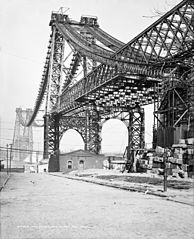

In [64]:
display.display(display.Image(filename=williamsburg_bridge))
display.display(display.HTML('<a "href=https://commons.wikimedia.org/wiki/File:New_East_River_Bridge_from_Brooklyn_det.4a09796u.jpg">From Wikimedia</a>'))

In [0]:
image_labels = {
    cat_in_snow : 0,
    williamsburg_bridge : 1,
}

In [66]:
image_string = open(cat_in_snow, 'rb').read()

label = image_labels[cat_in_snow]

def image_example(image_string, label):
  image_shape = tf.image.decode_jpeg(image_string).shape

  feature = {
      'height': _int64_feature(image_shape[0]),
      'width': _int64_feature(image_shape[1]),
      'depth': _int64_feature(image_shape[2]),
      'label': _int64_feature(label),
      'image_raw': _bytes_feature(image_string),
  }

  return tf.train.Example(features=tf.train.Features(feature=feature))

for line in str(image_example(image_string, label)).split('\n')[:15]:
  print(line)
print('...')

features {
  feature {
    key: "depth"
    value {
      int64_list {
        value: 3
      }
    }
  }
  feature {
    key: "height"
    value {
      int64_list {
        value: 213
      }
...


In [0]:
record_file = 'images.tfrecords'
with tf.io.TFRecordWriter(record_file) as writer:
  for filename, label in image_labels.items():
    image_string = open(filename, 'rb').read()
    tf_example = image_example(image_string, label)
    writer.write(tf_example.SerializeToString())

In [68]:
!du -sh {record_file}

36K	images.tfrecords


In [69]:
raw_image_dataset = tf.data.TFRecordDataset('images.tfrecords')

image_feature_description = {
    'height': tf.io.FixedLenFeature([], tf.int64),
    'width': tf.io.FixedLenFeature([], tf.int64),
    'depth': tf.io.FixedLenFeature([], tf.int64),
    'label': tf.io.FixedLenFeature([], tf.int64),
    'image_raw': tf.io.FixedLenFeature([], tf.string),
}

def _parse_image_function(example_proto):
  return tf.io.parse_single_example(example_proto, image_feature_description)

parsed_image_dataset = raw_image_dataset.map(_parse_image_function)
parsed_image_dataset

<MapDataset shapes: {depth: (), height: (), image_raw: (), label: (), width: ()}, types: {depth: tf.int64, height: tf.int64, image_raw: tf.string, label: tf.int64, width: tf.int64}>

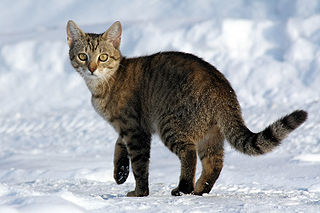

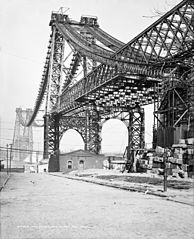

In [70]:
for image_features in parsed_image_dataset:
  image_raw = image_features['image_raw'].numpy()
  display.display(display.Image(data=image_raw))

Model Save & Load

In [71]:
!pip install h5py pyyaml

In [90]:
from __future__ import absolute_import, division, print_function, unicode_literals, unicode_literals

import os

try:
  %tensorflow_version 2.x
except Exception:
    pass
import tensorflow as tf
from tensorflow import keras

tf.__version__

'2.1.0-rc1'

In [73]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

train_labels = train_labels[:1000]
test_labels = test_labels[:1000]

train_images = train_images[:1000].reshape(-1, 28 * 28) / 255.0
test_images = test_images[:1000].reshape(-1, 28 * 28) / 255.0

11493376/11490434 [==============================] - 0s 0us/step


In [74]:
def create_model():
  model = tf.keras.models.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(784,)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')
  ])

  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

  return model


model = create_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [75]:
checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, save_weights_only=True, verbose=1)

model = create_model()

model.fit(train_images, train_labels,  epochs = 10,
          validation_data = (test_images,test_labels),
          callbacks = [cp_callback])

Train on 1000 samples, validate on 1000 samples
Epoch 1/10
 736/1000 [=====================>........] - ETA: 0s - loss: 1.3191 - accuracy: 0.6209
Epoch 00001: saving model to training_1/cp.ckpt
1000/1000 [==============================] - 1s 604us/sample - loss: 1.1381 - accuracy: 0.6790 - val_loss: 0.7070 - val_accuracy: 0.7780
Epoch 2/10
 832/1000 [=======================>......] - ETA: 0s - loss: 0.4191 - accuracy: 0.8762
Epoch 00002: saving model to training_1/cp.ckpt
1000/1000 [==============================] - 0s 233us/sample - loss: 0.4251 - accuracy: 0.8710 - val_loss: 0.5409 - val_accuracy: 0.8330
Epoch 3/10
 704/1000 [====================>.........] - ETA: 0s - loss: 0.2964 - accuracy: 0.9162
Epoch 00003: saving model to training_1/cp.ckpt
1000/1000 [==============================] - 0s 250us/sample - loss: 0.2938 - accuracy: 0.9120 - val_loss: 0.4729 - val_accuracy: 0.8480
Epoch 4/10
 768/1000 [======================>.......] - ETA: 0s - loss: 0.2262 - accuracy: 0.9492
Epoch

In [76]:
 !ls {checkpoint_dir}

checkpoint  cp.ckpt.data-00000-of-00001  cp.ckpt.index


In [77]:
model = create_model()

loss, acc = model.evaluate(test_images,  test_labels, verbose=2)
print("훈련되지 않은 모델의 정확도: {:5.2f}%".format(100*acc))

1000/1000 - 0s - loss: 2.3264 - accuracy: 0.1290
훈련되지 않은 모델의 정확도: 12.90%


In [78]:
model.load_weights(checkpoint_path)
loss,acc = model.evaluate(test_images,  test_labels, verbose=2)
print("복원된 모델의 정확도: {:5.2f}%".format(100*acc))

1000/1000 - 0s - loss: 0.3909 - accuracy: 0.8750
복원된 모델의 정확도: 87.50%


In [79]:
checkpoint_path = "training_2/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(
    checkpoint_path, verbose=1, save_weights_only=True, period=5)

model = create_model()
model.save_weights(checkpoint_path.format(epoch=0))
model.fit(train_images, train_labels,
          epochs = 50, callbacks = [cp_callback],
          validation_data = (test_images,test_labels),
          verbose=0)


Epoch 00005: saving model to training_2/cp-0005.ckpt

Epoch 00010: saving model to training_2/cp-0010.ckpt

Epoch 00015: saving model to training_2/cp-0015.ckpt

Epoch 00020: saving model to training_2/cp-0020.ckpt

Epoch 00025: saving model to training_2/cp-0025.ckpt

Epoch 00030: saving model to training_2/cp-0030.ckpt

Epoch 00035: saving model to training_2/cp-0035.ckpt

Epoch 00040: saving model to training_2/cp-0040.ckpt

Epoch 00045: saving model to training_2/cp-0045.ckpt

Epoch 00050: saving model to training_2/cp-0050.ckpt


In [80]:
! ls {checkpoint_dir}

checkpoint			  cp-0025.ckpt.index
cp-0000.ckpt.data-00000-of-00001  cp-0030.ckpt.data-00000-of-00001
cp-0000.ckpt.index		  cp-0030.ckpt.index
cp-0005.ckpt.data-00000-of-00001  cp-0035.ckpt.data-00000-of-00001
cp-0005.ckpt.index		  cp-0035.ckpt.index
cp-0010.ckpt.data-00000-of-00001  cp-0040.ckpt.data-00000-of-00001
cp-0010.ckpt.index		  cp-0040.ckpt.index
cp-0015.ckpt.data-00000-of-00001  cp-0045.ckpt.data-00000-of-00001
cp-0015.ckpt.index		  cp-0045.ckpt.index
cp-0020.ckpt.data-00000-of-00001  cp-0050.ckpt.data-00000-of-00001
cp-0020.ckpt.index		  cp-0050.ckpt.index
cp-0025.ckpt.data-00000-of-00001


In [81]:
latest = tf.train.latest_checkpoint(checkpoint_dir)
latest

'training_2/cp-0050.ckpt'

In [82]:
model = create_model()
model.load_weights(latest)
loss, acc = model.evaluate(test_images,  test_labels, verbose=2)
print("복원된 모델의 정확도: {:5.2f}%".format(100*acc))

1000/1000 - 0s - loss: 0.4728 - accuracy: 0.8780
복원된 모델의 정확도: 87.80%


In [83]:
model.save_weights('./checkpoints/my_checkpoint')

model = create_model()
model.load_weights('./checkpoints/my_checkpoint')

loss,acc = model.evaluate(test_images,  test_labels, verbose=2)
print("복원된 모델의 정확도: {:5.2f}%".format(100*acc))

1000/1000 - 0s - loss: 0.4728 - accuracy: 0.8780
복원된 모델의 정확도: 87.80%


In [84]:
model = create_model()

model.fit(train_images, train_labels, epochs=5)

model.save('my_model.h5')

Train on 1000 samples
Epoch 1/5
1000/1000 [==============================] - 0s 396us/sample - loss: 1.1526 - accuracy: 0.6680
Epoch 2/5
1000/1000 [==============================] - 0s 143us/sample - loss: 0.4173 - accuracy: 0.8780
Epoch 3/5
1000/1000 [==============================] - 0s 135us/sample - loss: 0.2921 - accuracy: 0.9290
Epoch 4/5
1000/1000 [==============================] - 0s 138us/sample - loss: 0.2066 - accuracy: 0.9520
Epoch 5/5
1000/1000 [==============================] - 0s 141us/sample - loss: 0.1462 - accuracy: 0.9700


In [85]:
new_model = keras.models.load_model('my_model.h5')
print(new_model.summary())

loss, acc = new_model.evaluate(test_images,  test_labels, verbose=2)
print("복원된 모델의 정확도: {:5.2f}%".format(100*acc))

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
None
1000/1000 - 0s - loss: 0.4386 - accuracy: 0.8620
복원된 모델의 정확도: 86.20%


In [86]:
model = create_model()

model.fit(train_images, train_labels, epochs=5)

Train on 1000 samples
Epoch 1/5
1000/1000 [==============================] - 0s 404us/sample - loss: 1.1490 - accuracy: 0.6890
Epoch 2/5
1000/1000 [==============================] - 0s 143us/sample - loss: 0.4388 - accuracy: 0.8810
Epoch 3/5
1000/1000 [==============================] - 0s 141us/sample - loss: 0.2847 - accuracy: 0.9290
Epoch 4/5
1000/1000 [==============================] - 0s 149us/sample - loss: 0.2254 - accuracy: 0.9370
Epoch 5/5
1000/1000 [==============================] - 0s 136us/sample - loss: 0.1628 - accuracy: 0.9680


In [91]:
import time
saved_model_path = "./saved_models/{}".format(int(time.time()))

tf.keras.experimental.export_saved_model(model, saved_model_path)
saved_model_path

AttributeError: ignored

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf

import time

In [0]:
class ArtificialDataset(tf.data.Dataset):
    def _generator(num_samples):
        time.sleep(0.03)
        
        for sample_idx in range(num_samples):
            time.sleep(0.015)
            yield (sample_idx,)
    
    def __new__(cls, num_samples=3):
        return tf.data.Dataset.from_generator(
            cls._generator,
            output_types=tf.dtypes.int64,
            output_shapes=(1,),
            args=(num_samples,)
        )

In [0]:
def benchmark(dataset, num_epochs=2):
    start_time = time.perf_counter()
    for epoch_num in range(num_epochs):
        for sample in dataset:
            time.sleep(0.01)
    tf.print("Execution time:", time.perf_counter() - start_time)

In [96]:
benchmark(ArtificialDataset())

Execution time: 0.2331076469999971


In [97]:
benchmark(
    ArtificialDataset()
    .prefetch(tf.data.experimental.AUTOTUNE)
)

Execution time: 0.19473698799993144


In [98]:
benchmark(
    tf.data.Dataset.range(2)
    .interleave(ArtificialDataset)
)

Execution time: 0.1968762209999113


In [99]:
benchmark(
    tf.data.Dataset.range(2)
    .interleave(
        ArtificialDataset,
        num_parallel_calls=tf.data.experimental.AUTOTUNE
    )
)

Execution time: 0.13599274899979719


In [0]:
def mapped_function(s):

    tf.py_function(lambda: time.sleep(0.03), [], ())
    return s

In [101]:
benchmark(
    ArtificialDataset()
    .map(mapped_function)
)

Execution time: 0.4217309710002155


In [102]:
benchmark(
    ArtificialDataset()
    .map(
        mapped_function,
        num_parallel_calls=tf.data.experimental.AUTOTUNE
    )
)

Execution time: 0.28396584899974187


In [104]:
benchmark(
    ArtificialDataset()
    .map(  
        mapped_function
    ).cache(
    ),
    5
)

Execution time: 0.36480120600026567


In [0]:
fast_dataset = tf.data.Dataset.range(10000)

def fast_benchmark(dataset, num_epochs=2):
    start_time = time.perf_counter()
    for _ in tf.data.Dataset.range(num_epochs):
        for _ in dataset:
            pass
    tf.print("Execution time:", time.perf_counter() - start_time)
    
def increment(x):
    return x+1

In [106]:
fast_benchmark(
    fast_dataset
    .map(increment)
    .batch(256)
)

Execution time: 0.5798821230000613


In [107]:
fast_benchmark(
    fast_dataset
    .batch(256)
    .map(increment)
)

Execution time: 0.044051426999885734


In [0]:
import itertools
from collections import defaultdict

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [0]:
class TimeMeasuredDataset(tf.data.Dataset):
    OUTPUT_TYPES = (tf.dtypes.string, tf.dtypes.float32, tf.dtypes.int32)
    OUTPUT_SHAPES = ((2, 1), (2, 2), (2, 3))
    
    _INSTANCES_COUNTER = itertools.count()  
    _EPOCHS_COUNTER = defaultdict(itertools.count)  
    
    def _generator(instance_idx, num_samples):
        epoch_idx = next(TimeMeasuredDataset._EPOCHS_COUNTER[instance_idx])
        
        open_enter = time.perf_counter()
        time.sleep(0.03)
        open_elapsed = time.perf_counter() - open_enter
        
        for sample_idx in range(num_samples):
            read_enter = time.perf_counter()
            time.sleep(0.015)
            read_elapsed = time.perf_counter() - read_enter
            
            yield (
                [("Open",), ("Read",)],
                [(open_enter, open_elapsed), (read_enter, read_elapsed)],
                [(instance_idx, epoch_idx, -1), (instance_idx, epoch_idx, sample_idx)]
            )
            open_enter, open_elapsed = -1., -1. 
            
    
    def __new__(cls, num_samples=3):
        return tf.data.Dataset.from_generator(
            cls._generator,
            output_types=cls.OUTPUT_TYPES,
            output_shapes=cls.OUTPUT_SHAPES,
            args=(next(cls._INSTANCES_COUNTER), num_samples)
        )

In [0]:
def timelined_benchmark(dataset, num_epochs=2):
    steps_acc = tf.zeros([0, 1], dtype=tf.dtypes.string)
    times_acc = tf.zeros([0, 2], dtype=tf.dtypes.float32)
    values_acc = tf.zeros([0, 3], dtype=tf.dtypes.int32)
    
    start_time = time.perf_counter()
    for epoch_num in range(num_epochs):
        epoch_enter = time.perf_counter()
        for (steps, times, values) in dataset:
            steps_acc = tf.concat((steps_acc, steps), axis=0)
            times_acc = tf.concat((times_acc, times), axis=0)
            values_acc = tf.concat((values_acc, values), axis=0)
            
            train_enter = time.perf_counter()
            time.sleep(0.01)
            train_elapsed = time.perf_counter() - train_enter
            

            steps_acc = tf.concat((steps_acc, [["Train"]]), axis=0)
            times_acc = tf.concat((times_acc, [(train_enter, train_elapsed)]), axis=0)
            values_acc = tf.concat((values_acc, [values[-1]]), axis=0)
        
        epoch_elapsed = time.perf_counter() - epoch_enter
        steps_acc = tf.concat((steps_acc, [["Epoch"]]), axis=0)
        times_acc = tf.concat((times_acc, [(epoch_enter, epoch_elapsed)]), axis=0)
        values_acc = tf.concat((values_acc, [[-1, epoch_num, -1]]), axis=0)
        time.sleep(0.001)
    
    tf.print("Execution time:", time.perf_counter() - start_time)
    return {"steps": steps_acc, "times": times_acc, "values": values_acc}

In [0]:
 def draw_timeline(timeline, title, width=0.5, annotate=False, save=False):
    # Remove invalid entries (negative times, or empty steps) from the timelines
    invalid_mask = np.logical_and(timeline['times'] > 0, timeline['steps'] != b'')[:,0]
    steps = timeline['steps'][invalid_mask].numpy()
    times = timeline['times'][invalid_mask].numpy()
    values = timeline['values'][invalid_mask].numpy()

    step_ids, indices = np.stack(np.unique(steps, return_index=True))
    step_ids = step_ids[np.argsort(indices)]

    min_time = times[:,0].min()
    times[:,0] = (times[:,0] - min_time)
    end = max(width, (times[:,0]+times[:,1]).max() + 0.01)
    
    cmap = mpl.cm.get_cmap("plasma")
    plt.close()
    fig, axs = plt.subplots(len(step_ids), sharex=True, gridspec_kw={'hspace': 0})
    fig.suptitle(title)
    fig.set_size_inches(17.0, len(step_ids))
    plt.xlim(-0.01, end)
    
    for i, step in enumerate(step_ids):
        step_name = step.decode()
        ax = axs[i]
        ax.set_ylabel(step_name)
        ax.set_ylim(0, 1)
        ax.set_yticks([])
        ax.set_xlabel("time (s)")
        ax.set_xticklabels([])
        ax.grid(which="both", axis="x", color="k", linestyle=":")

        entries_mask = np.squeeze(steps==step)
        serie = np.unique(times[entries_mask], axis=0)
        annotations = values[entries_mask]
        
        ax.broken_barh(serie, (0, 1), color=cmap(i / len(step_ids)), linewidth=1, alpha=0.66)
        if annotate:
            for j, (start, width) in enumerate(serie):
                annotation = "\n".join([f"{l}: {v}" for l,v in zip(("i", "e", "s"), annotations[j])])
                ax.text(start + 0.001 + (0.001 * (j % 2)), 0.55 - (0.1 * (j % 2)), annotation,
                        horizontalalignment='left', verticalalignment='center')
    if save:
        plt.savefig(title.lower().translate(str.maketrans(" ", "_")) + ".svg")

In [0]:
def map_decorator(func):
    def wrapper(steps, times, values):
        return tf.py_function(
            func,
            inp=(steps, times, values),
            Tout=(steps.dtype, times.dtype, values.dtype)
        )
    return wrapper

In [0]:
_batch_map_num_items = 50

def dataset_generator_fun(*args):
    return TimeMeasuredDataset(num_samples=_batch_map_num_items)

In [114]:
@map_decorator
def naive_map(steps, times, values):
    map_enter = time.perf_counter()
    time.sleep(0.001)  
    time.sleep(0.0001) 
    map_elapsed = time.perf_counter() - map_enter

    return (
        tf.concat((steps, [["Map"]]), axis=0),
        tf.concat((times, [[map_enter, map_elapsed]]), axis=0),
        tf.concat((values, [values[-1]]), axis=0)
    )

naive_timeline = timelined_benchmark(
    tf.data.Dataset.range(2)
    .flat_map(dataset_generator_fun)
    .map(naive_map)
    .batch(_batch_map_num_items, drop_remainder=True)
    .unbatch(),
    5
)

Execution time: 12.00114668399965


In [115]:
@map_decorator
def time_consumming_map(steps, times, values):
    map_enter = time.perf_counter()
    time.sleep(0.001 * values.shape[0])  
    map_elapsed = time.perf_counter() - map_enter

    return (
        tf.concat((steps, tf.tile([[["1st map"]]], [steps.shape[0], 1, 1])), axis=1),
        tf.concat((times, tf.tile([[[map_enter, map_elapsed]]], [times.shape[0], 1, 1])), axis=1),
        tf.concat((values, tf.tile([[values[:][-1][0]]], [values.shape[0], 1, 1])), axis=1)
    )


@map_decorator
def memory_consumming_map(steps, times, values):
    map_enter = time.perf_counter()
    time.sleep(0.0001 * values.shape[0])  
    map_elapsed = time.perf_counter() - map_enter

    # Use tf.tile to handle batch dimension
    return (
        tf.concat((steps, tf.tile([[["2nd map"]]], [steps.shape[0], 1, 1])), axis=1),
        tf.concat((times, tf.tile([[[map_enter, map_elapsed]]], [times.shape[0], 1, 1])), axis=1),
        tf.concat((values, tf.tile([[values[:][-1][0]]], [values.shape[0], 1, 1])), axis=1)
    )


optimized_timeline = timelined_benchmark(
    tf.data.Dataset.range(2)
    .interleave(  
        dataset_generator_fun,
        num_parallel_calls=tf.data.experimental.AUTOTUNE
    )
    .batch(  
        _batch_map_num_items,
        drop_remainder=True)
    .map(  
        time_consumming_map,
        num_parallel_calls=tf.data.experimental.AUTOTUNE
    )
    .cache()  
    .map(  
        memory_consumming_map,
        num_parallel_calls=tf.data.experimental.AUTOTUNE
    )
    .prefetch(  
        tf.data.experimental.AUTOTUNE
    )
    .unbatch(),
    5
)

Execution time: 6.145156611000402


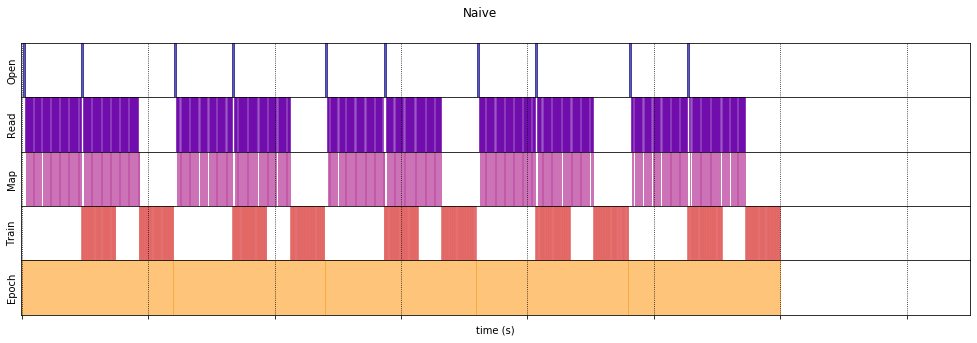

In [116]:
draw_timeline(naive_timeline, "Naive", 15)

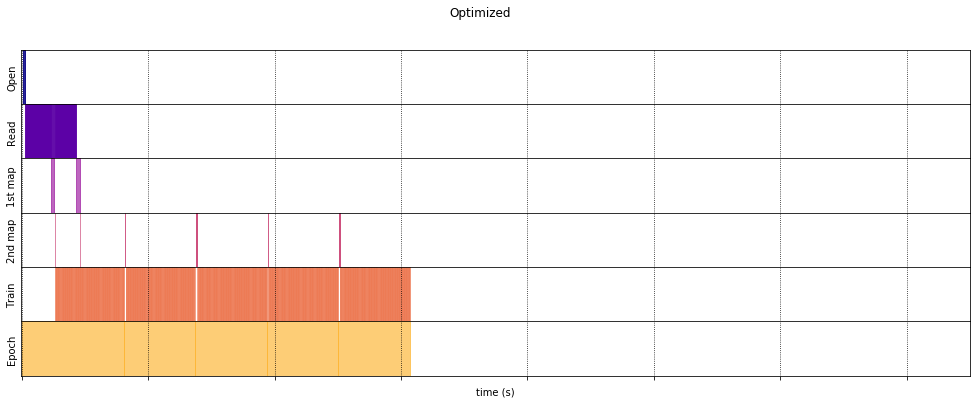

In [117]:
draw_timeline(optimized_timeline, "Optimized", 15)